## EPSY 5200: Programming Fundamentals for Social Science Researchers
## Fall 2020 Week 12
### Web Scraping with Python

In [1]:
# import requests
# requests.whatever
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
# this just loads all fxns and attaches their names to our enviro
# in other words, no need to use the package name

In [2]:
# some functions adapted from RealPython demo:
# https://realpython.com/python-web-scraping-practical-introduction/

def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None.
    """
    try: # make an attempt to do this, but if there's an ERROR, jump to the "except"
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp): # calls function defined below
                return resp.content
            else:
                return None
    except RequestException as e: # only runs if error occurs above
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


def is_good_response(resp):
    """
    Returns True if the response seems to be HTML, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 # remember that 200 means all OK!
            and content_type is not None # makes sure there's *something* in content
            and content_type.find('html') > -1)


def log_error(e): # just in case error above, prints it
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)

In [3]:
raw = simple_get("http://blogs.edweek.org/edweek/inside-school-research/")

In [4]:
raw

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html id="sixapart-standard" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" xmlns:addthis="http://www.addthis.com/help/api-spec" itemscope itemtype="http://schema.org/Blog">\n<head>\n<meta name="st:robots" content="noindex">\n<meta name="Category_primary" content="/edweek/inside-school-research/" />\n<meta name="Category_secondary" content="/inside-school-research/" />\n<meta itemprop="about" content="inside-school-research" />\n<meta class="swiftype" name="coverpage" data-type="enum" content="true" />\n<meta name="Description" content="From achievement gaps and teacher evaluations to homework and student engagement, <i>Education Week</i> reporters help you understand the education research behind big policy debates and daily classroom concerns. " />\n<meta name="ID" content="B:65" />\n<link rel="EditURI" type="application/rsd+xml" title="RS

In [7]:
raw2 = simple_get("http://blogs.edweek.org/edweek/inside-school-research/blahblah_jeffiscool.html")
raw2 is None

True

In [8]:
proc = BeautifulSoup(raw, 'html.parser')
proc

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html id="sixapart-standard" itemscope="" itemtype="http://schema.org/Blog" xmlns="http://www.w3.org/1999/xhtml" xmlns:addthis="http://www.addthis.com/help/api-spec" xmlns:fb="http://ogp.me/ns/fb#">
<head>
<meta content="noindex" name="st:robots"/>
<meta content="/edweek/inside-school-research/" name="Category_primary">
<meta content="/inside-school-research/" name="Category_secondary"/>
<meta content="inside-school-research" itemprop="about"/>
<meta class="swiftype" content="true" data-type="enum" name="coverpage"/>
<meta content="From achievement gaps and teacher evaluations to homework and student engagement, &lt;i&gt;Education Week&lt;/i&gt; reporters help you understand the education research behind big policy debates and daily classroom concerns. " name="Description"/>
<meta content="B:65" name="ID"/>
<link href="http://blogs.edweek.org/edweek/inside-school-r

In [10]:
meta_list = proc.select('meta')
meta_list

[<meta content="noindex" name="st:robots"/>,
 <meta content="/edweek/inside-school-research/" name="Category_primary">
 <meta content="/inside-school-research/" name="Category_secondary"/>
 <meta content="inside-school-research" itemprop="about"/>
 <meta class="swiftype" content="true" data-type="enum" name="coverpage"/>
 <meta content="From achievement gaps and teacher evaluations to homework and student engagement, &lt;i&gt;Education Week&lt;/i&gt; reporters help you understand the education research behind big policy debates and daily classroom concerns. " name="Description"/>
 <meta content="B:65" name="ID"/>
 <link href="http://blogs.edweek.org/edweek/inside-school-research/rsd.xml" rel="EditURI" title="RSD" type="application/rsd+xml"/>
 <title>Inside School Research - Education Week</title>
 <link href="http://mobile.edweek.org/c.jsp?cid=25920011&amp;item=http%3a%2f%2fapi.edweek.org%2fv1%2fblogs%2f65%2f" media="only screen and (max-width: 640px)" rel="alternate"/>
 <meta name="ap

In [11]:
type(meta_list)

list

In [12]:
from lxml import html
from bs4 import BeautifulSoup

In [14]:
raw3 = get("http://blogs.edweek.org/edweek/inside-school-research/")
raw3.content

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html id="sixapart-standard" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" xmlns:addthis="http://www.addthis.com/help/api-spec" itemscope itemtype="http://schema.org/Blog">\n<head>\n<meta name="st:robots" content="noindex">\n<meta name="Category_primary" content="/edweek/inside-school-research/" />\n<meta name="Category_secondary" content="/inside-school-research/" />\n<meta itemprop="about" content="inside-school-research" />\n<meta class="swiftype" name="coverpage" data-type="enum" content="true" />\n<meta name="Description" content="From achievement gaps and teacher evaluations to homework and student engagement, <i>Education Week</i> reporters help you understand the education research behind big policy debates and daily classroom concerns. " />\n<meta name="ID" content="B:65" />\n<link rel="EditURI" type="application/rsd+xml" title="RS

In [15]:
proc3 = html.fromstring(raw3.content)

In [16]:
proc3

<Element html at 0x7fd27547ddd0>

In [17]:
proc3.getchildren()

[<Element head at 0x7fd27547a2f0>, <Element body at 0x7fd27547a110>]

<html>
  <head>
    <title>html is cool</title>
  </head>
  <body>
    html is so so cool
  </body>
</html>

In [18]:
proc3.getchildren()[1]

<Element body at 0x7fd27547a110>

In [19]:
proc3.getchildren()[1].getchildren()

[<Element div at 0x7fd27547a890>]

In [20]:
proc3.getchildren()[1].getchildren()[0].getchildren()

[<!--googleoff: all-->,
 <Element link at 0x7fd27547a530>,
 <Element script at 0x7fd27547ab90>,
 <!--googleoff: all-->,
 <Element div at 0x7fd27547ac50>,
 <!--googleoff: all-->,
 <Element a at 0x7fd27547ad10>,
 <Element div at 0x7fd27547ad70>,
 <Element div at 0x7fd27547add0>,
 <Element style at 0x7fd27547ae30>,
 <Element script at 0x7fd27547ae90>,
 <!--googleon: all-->,
 <Element div at 0x7fd27547af50>,
 <Element script at 0x7fd27547afb0>,
 <!--googleon: all-->,
 <Element div at 0x7fd2754770b0>,
 <!--googleon: all-->,
 <Element div at 0x7fd275477170>,
 <!--googleoff: all-->,
 <Element div at 0x7fd275477230>,
 <!--googleon: all-->,
 <Element div at 0x7fd2754772f0>,
 <Element meta at 0x7fd275477350>,
 <!--googleoff: all-->,
 <Element script at 0x7fd275477410>,
 <Element script at 0x7fd275477470>,
 <Element script at 0x7fd2754774d0>,
 <Element script at 0x7fd275477530>,
 <Element script at 0x7fd275477590>,
 <Element script at 0x7fd2754775f0>,
 <Element script at 0x7fd275477650>,
 <Elemen

In [57]:
spans = proc3.xpath('//span[@class="label secondary"]')
spans

[<Element span at 0x7fd275477bf0>,
 <Element span at 0x7fd275477e30>,
 <Element span at 0x7fd275477e90>,
 <Element span at 0x7fd275477ef0>,
 <Element span at 0x7fd275477f50>,
 <Element span at 0x7fd275477fb0>,
 <Element span at 0x7fd275480050>,
 <Element span at 0x7fd2754800b0>,
 <Element span at 0x7fd275480110>,
 <Element span at 0x7fd275480170>,
 <Element span at 0x7fd2754801d0>,
 <Element span at 0x7fd275480230>,
 <Element span at 0x7fd275480290>,
 <Element span at 0x7fd2754802f0>,
 <Element span at 0x7fd275480350>,
 <Element span at 0x7fd2754803b0>]

In [29]:
spans[0].getchildren()[0].text.replace('\n','')

'Coronavirus and schools research'

In [30]:
spans[7].getchildren()[0].text.replace('\n','')

'education policy research'

In [31]:
for e in spans:
    print( e.getchildren()[0].text.replace('\n','') )

Coronavirus and schools research
Coronavirus and schools research
Coronavirus and schools research
National Assessment of Educational Progress
National Center on Education Statistics
federal education statistics
child health and well-being research
education policy research
Coronavirus and schools research
child health and well-being research
parenting research
Coronavirus and schools research
child health and well-being research
school inequality and equity research
school inequality and equity research
Coronavirus and schools research


In [33]:
import pandas as pd

In [34]:
keywords = []
for e in spans:
    keywords.append({'Keyword': e.getchildren()[0].text.replace('\n','')})

kw = pd.DataFrame(keywords)
kw

,Keyword
0,Coronavirus and schools research
1,Coronavirus and schools research
2,Coronavirus and schools research
3,National Assessment of Educational Progress
4,National Center on Education Statistics
5,federal education statistics
6,child health and well-being research
7,education policy research
8,Coronavirus and schools research
9,child health and well-being research


In [35]:
kw.Keyword.value_counts()

Coronavirus and schools research               6
child health and well-being research           3
school inequality and equity research          2
National Center on Education Statistics        1
parenting research                             1
federal education statistics                   1
education policy research                      1
National Assessment of Educational Progress    1
Name: Keyword, dtype: int64

In [36]:
type(kw.Keyword.value_counts())

pandas.core.series.Series

In [39]:
pd.DataFrame(kw.Keyword.value_counts())

,Keyword
Coronavirus and schools research,6
child health and well-being research,3
school inequality and equity research,2
National Center on Education Statistics,1
parenting research,1
federal education statistics,1
education policy research,1
National Assessment of Educational Progress,1


In [40]:
kw_counts = kw.Keyword.value_counts()

In [41]:
kw_counts.index

Index(['Coronavirus and schools research',
       'child health and well-being research',
       'school inequality and equity research',
       'National Center on Education Statistics', 'parenting research',
       'federal education statistics', 'education policy research',
       'National Assessment of Educational Progress'],
      dtype='object')

In [42]:
kw_counts.index.tolist()

['Coronavirus and schools research',
 'child health and well-being research',
 'school inequality and equity research',
 'National Center on Education Statistics',
 'parenting research',
 'federal education statistics',
 'education policy research',
 'National Assessment of Educational Progress']

In [50]:
kw_df = pd.DataFrame( {'Keyword': kw_counts.index.tolist(), 'Frequency': kw_counts.values.tolist() } )
kw_df

,Keyword,Frequency
0,Coronavirus and schools research,6
1,child health and well-being research,3
2,school inequality and equity research,2
3,National Center on Education Statistics,1
4,parenting research,1
5,federal education statistics,1
6,education policy research,1
7,National Assessment of Educational Progress,1


In [47]:
import seaborn as sns
import matplotlib as plt
# sns.barplot

https://www.geeksforgeeks.org/web-scraping-using-lxml-and-xpath-in-python/

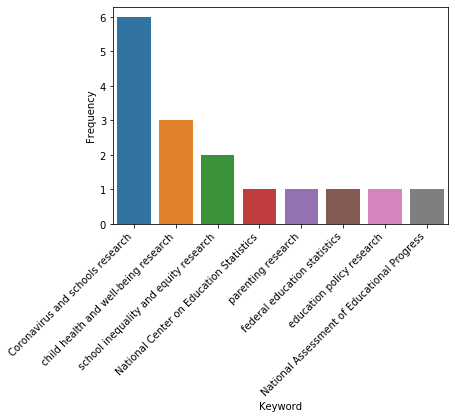

In [62]:
kw_freq_plt = sns.barplot(x="Keyword", y="Frequency", data=kw_df)
kw_freq_plt = kw_freq_plt.set_xticklabels(kw_freq_plt.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

In [64]:
pages = list(range(1, 154))

keywords = []

for p in pages:
    # grab that page's raw data
    raw = get("http://blogs.edweek.org/edweek/inside-school-research/?page=" + str(p))
    # process it with lxml
    proc = html.fromstring(raw.content)
    # search for spans that have class set to "label secondary"
    spans = proc.xpath('//span[@class="label secondary"]')
    
    # go through each span, grab the text inside the link
    for e in spans:
        keywords.append({'Keyword': e.getchildren()[0].text.replace('\n','')})

kw = pd.DataFrame(keywords)
kw

,Keyword
0,Coronavirus and schools research
1,Coronavirus and schools research
2,Coronavirus and schools research
3,National Assessment of Educational Progress
4,National Center on Education Statistics
...,...
2262,Institute of Education Sciences
2263,American Educational Research Association
2264,What Works Clearinghouse
2265,child health and well-being research


In [65]:
kw.Keyword.value_counts()

education research                                                             290
federal education research                                                     177
education policy research                                                      158
achievement gap research                                                       124
Student engagement and motivation research                                      96
school inequality and equity research                                           94
federal education statistics                                                    91
child health and well-being research                                            86
brain research (cognition and neuroscience)                                     70
Institute of Education Sciences                                                 61
teacher research                                                                57
evidence-based practice                                                         56
STEM

In [ ]:
# Challenge:
# plot of all the keywords, with x-ticks at 45 degree angle
# AND plot just a subset of the data with 25+ occurrences